# ImageNet比賽的英雄們!


### 因為在深度學習的應用，常常會有Python和套件版本相依性的問題存在，因此我們這邊提出確認版本的方法，未來電腦程式執行有問題時可以依此確認過!

In [1]:
import tensorflow
print(tensorflow.__version__)

2.12.0


In [2]:
import tensorflow.keras as ks
ks.__version__

'2.12.0'

In [3]:
!python --version

Python 3.10.11


In [4]:
from keras.applications.resnet import ResNet101
#from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from keras.applications.resnet import preprocess_input, decode_predictions
import numpy as np

model = ResNet101(weights='imagenet', include_top=True)

179648224/179648224 [==============================] - 1s 0us/step


In [5]:
model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [6]:
img_url = 'https://cdn.pixabay.com/photo/2016/02/19/15/46/labrador-retriever-1210559_960_720.jpg'


In [7]:
!wget -O dog01.jpg https://cdn.pixabay.com/photo/2016/02/19/15/46/labrador-retriever-1210559_960_720.jpg

--2023-05-05 06:42:32--  https://cdn.pixabay.com/photo/2016/02/19/15/46/labrador-retriever-1210559_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.15.16, 104.18.14.16, 2606:4700::6812:e10, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.15.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139598 (136K) [binary/octet-stream]
Saving to: ‘dog01.jpg’

dog01.jpg           100%[===================>] 136.33K  --.-KB/s    in 0.02s   

2023-05-05 06:42:32 (5.81 MB/s) - ‘dog01.jpg’ saved [139598/139598]



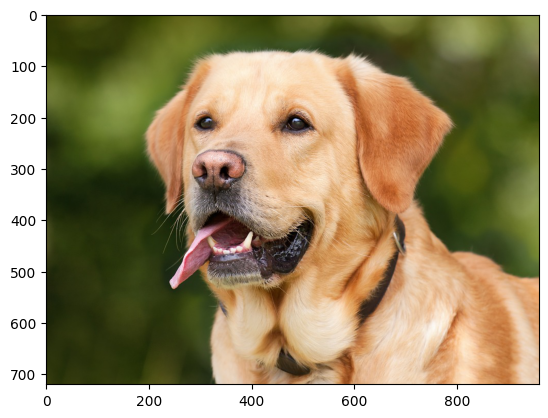

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./dog01.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img_path = './dog01.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
features = model.predict(x)
print('Predicted: ', decode_predictions(features, top=3)[0])

Predicted:  [('n02099712', 'Labrador_retriever', 0.6148026), ('n02099601', 'golden_retriever', 0.23529132), ('n02108551', 'Tibetan_mastiff', 0.025201831)]


In [ ]:
img_path = './dog01.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
features = model.predict(x)
print('Predicted: ', decode_predictions(features, top=3)[0])

Predicted:  [('n02099712', 'Labrador_retriever', 0.6322559), ('n02099601', 'golden_retriever', 0.18039823), ('n02087394', 'Rhodesian_ridgeback', 0.07281511)]


----
## 練習題：請仿照我們week02時做的「貓貓辨視器」，利用VGG也再如法泡制一個「貓貓辨視器」、及「鯊魚辨識器」(或是你有興趣的動物!!)

### 小提示
- 先準備好 is_cat()的判斷函式
- 把predict機率最高的名稱取出來

In [ ]:
def is_cat(label):
    return label in [
        'tiger_cat',
        'Persian_cat',
        'Siamese_cat',
        'Egyptian_cat',
        'tabby',
    ]

In [ ]:
img_path = './img.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
my_label = decode_predictions(features, top=1)[0][0][1]
print(my_label, is_cat(my_label))


Siamese_cat True
